In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bank_additional=pd.read_csv('bank-additional.csv', delimiter=';')

df_bank_additional.shape

(4119, 21)

In [3]:
def cleanAndTransform(df):
  '''
  Clean and transform categorical and numerical columns.
  '''
  df=df.copy()

  # Replace 'unkown' with NaN
  df.replace('unknown', np.nan, inplace=True)

  # Clean categorical columns - Impute Missing Values
  for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode().values[0], inplace=True)

  # Column Transformations
  for col in df.select_dtypes(include=['int64']).columns:
    df[col]=df[col].astype(np.float64)

  for col in ['default', 'housing', 'loan', 'y']:
    df[col]=np.where(df[col]=='yes', 1.0, 0.0)

  for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].astype('category')

  # Clean numerical columns - Normalize using MinMax
  for col in df.select_dtypes(include=['float64']).columns:
    min_value = df[col].min()
    max_value = df[col].max()
    df[col]=((df[col] - min_value) / (max_value - min_value))

  return df


# Bank additional

In [3]:
df_bank_additional.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,unknown,yes
loan,no,no,no,unknown,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [4]:
df_bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df_bank_additional.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119.0,NaN,NaN,NaN,40.11362,10.313362,18.0,32.0,38.0,47.0,88.0
job,4119,12,admin.,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4119,4,married,2509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4119,8,university.degree,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4119,3,no,3315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,4119,3,yes,2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4119,3,no,3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


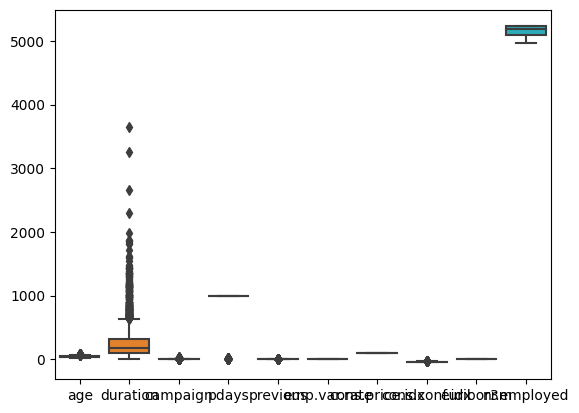

In [6]:
sns.boxplot(data=df_bank_additional)
plt.show();

## Column Type Transformations

In [61]:
df3=cleanAndTransform(df_bank_additional)

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4119 non-null   float64 
 1   job             4119 non-null   category
 2   marital         4119 non-null   category
 3   education       4119 non-null   category
 4   default         4119 non-null   float64 
 5   housing         4119 non-null   float64 
 6   loan            4119 non-null   float64 
 7   contact         4119 non-null   category
 8   month           4119 non-null   category
 9   day_of_week     4119 non-null   category
 10  duration        4119 non-null   float64 
 11  campaign        4119 non-null   float64 
 12  pdays           4119 non-null   float64 
 13  previous        4119 non-null   float64 
 14  poutcome        4119 non-null   category
 15  emp.var.rate    4119 non-null   float64 
 16  cons.price.idx  4119 non-null   float64 
 17  cons.conf.idx 

In [63]:
df3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119.0,NaN,NaN,NaN,0.315909,0.147334,0.0,0.2,0.285714,0.414286,1.0
job,4119,11,admin.,1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4119,3,married,2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4119,7,university.degree,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4119.0,NaN,NaN,NaN,0.000243,0.015581,0.0,0.0,0.0,0.0,1.0
housing,4119.0,NaN,NaN,NaN,0.553532,0.497186,0.0,0.0,1.0,1.0,1.0
loan,4119.0,NaN,NaN,NaN,0.161447,0.367987,0.0,0.0,0.0,0.0,1.0
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


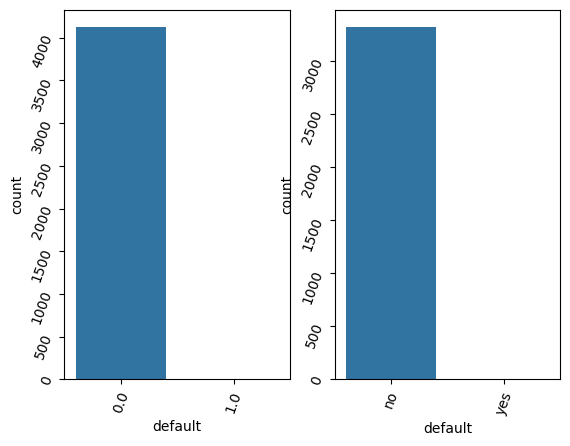

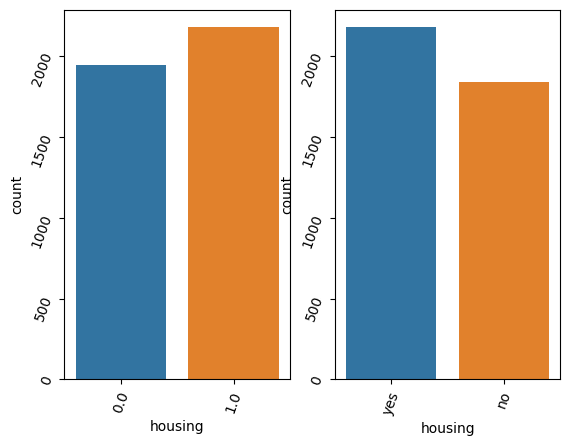

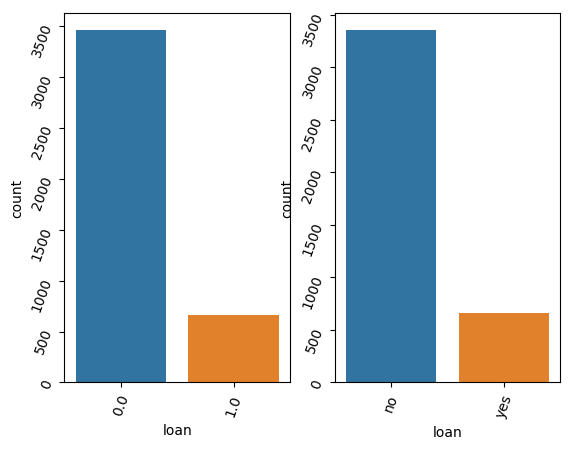

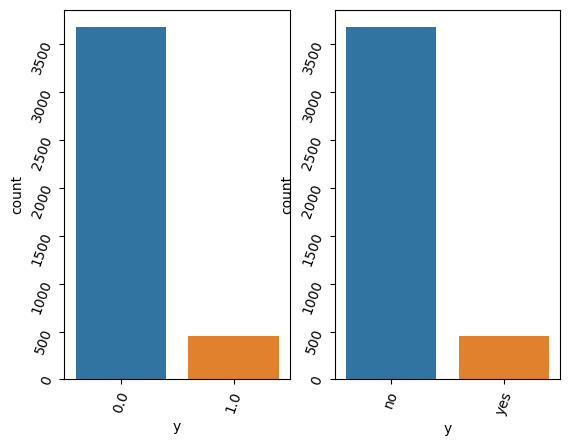

In [43]:
df2=df_bank_additional.copy()
for col in ['default', 'housing', 'loan', 'y']:
  df2[col]=np.where(df2[col]=='yes', 1.0, 0.0)

for col in ['default', 'housing', 'loan', 'y']:
  plt.subplot(121)
  sns.countplot(data=df2, x=col).tick_params(labelrotation=70);
  plt.subplot(122)
  sns.countplot(data=df_bank_additional, x=col).tick_params(labelrotation=70);
  # plt.title(f"{col}, top - {df_bank_additional[col].mode().values[0]}, NA count - {df_bank_additional[col].isna().sum()}/4119")
  plt.show();

In [8]:
df_bank_additional.replace('unknown', np.nan, inplace=True)

In [9]:
df_bank_additional.head().T

,0,1,2,3,4
age,30,39,25,38,47
job,blue-collar,services,services,services,admin.
marital,married,single,married,married,married
education,basic.9y,high.school,high.school,basic.9y,university.degree
default,no,no,no,no,no
housing,yes,no,yes,NaN,yes
loan,no,no,no,NaN,no
contact,cellular,telephone,telephone,telephone,cellular
month,may,may,jun,jun,nov
day_of_week,fri,fri,wed,fri,mon


In [10]:
df_bank_additional.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119.0,NaN,NaN,NaN,40.11362,10.313362,18.0,32.0,38.0,47.0,88.0
job,4080,11,admin.,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4108,3,married,2509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,3952,7,university.degree,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,3316,2,no,3315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,4014,2,yes,2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4014,2,no,3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [13]:
for col in df_bank_additional.select_dtypes(include=['int64']).columns:
  df_bank_additional[col]=df_bank_additional[col].astype(np.float64)

In [14]:
df_bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [15]:
df_bank_additional.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119.0,NaN,NaN,NaN,40.11362,10.313362,18.0,32.0,38.0,47.0,88.0
job,4080,11,admin.,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4108,3,married,2509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,3952,7,university.degree,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,3316,2,no,3315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,4014,2,yes,2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4014,2,no,3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_bank_additional.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [38]:
df_bank_additional['default']

pandas.core.series.Series

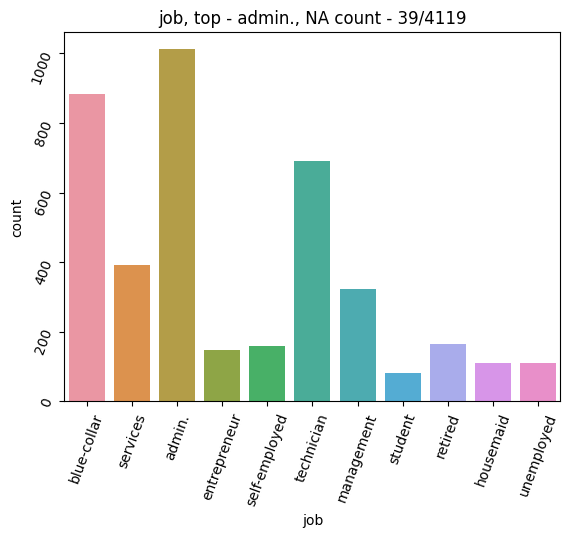

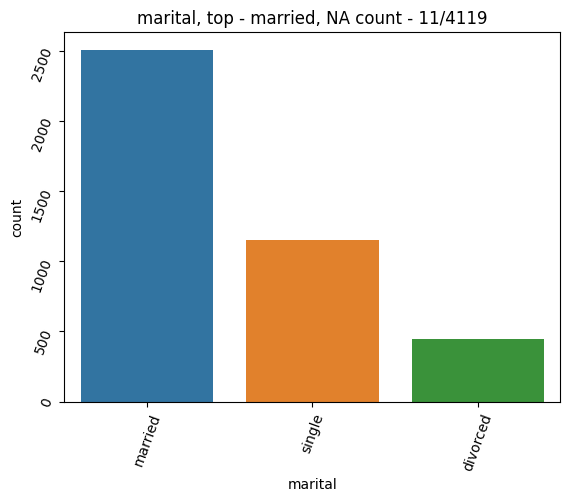

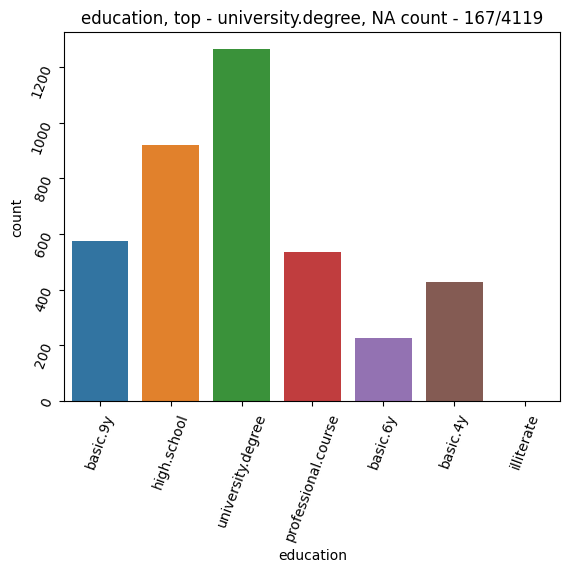

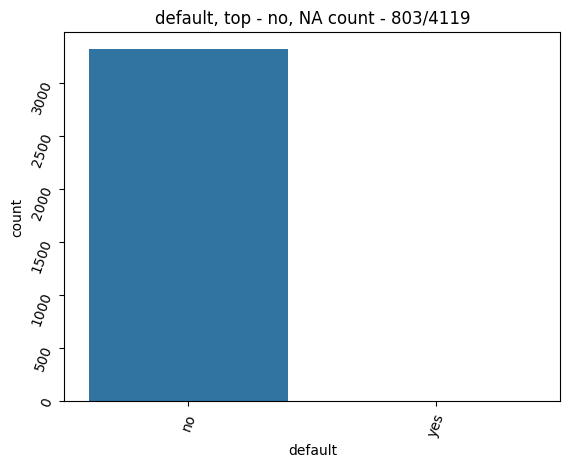

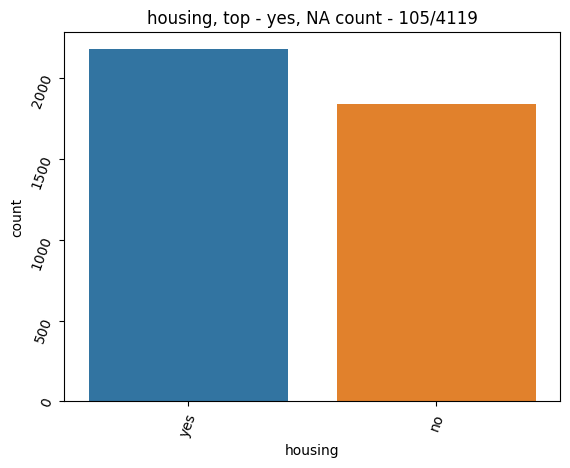

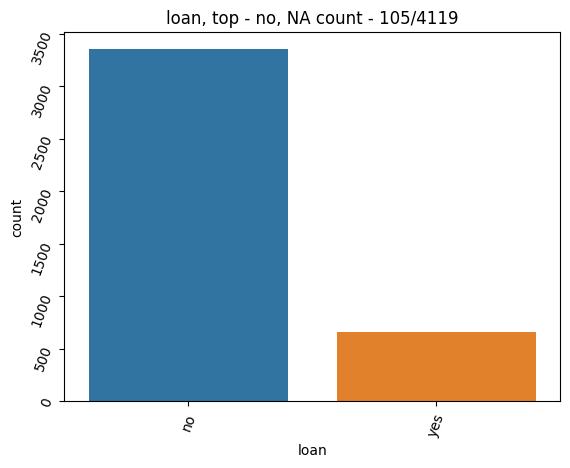

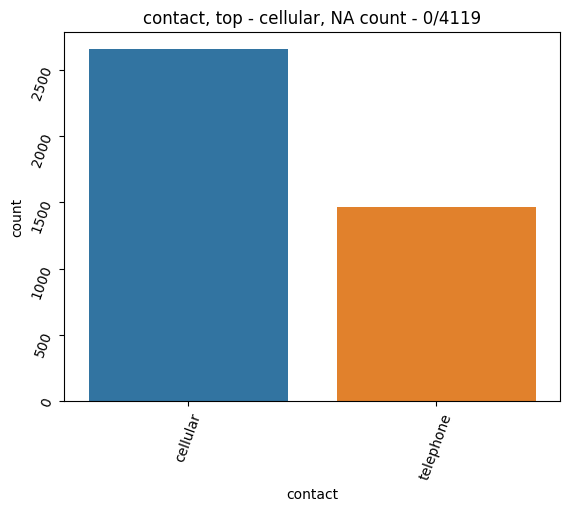

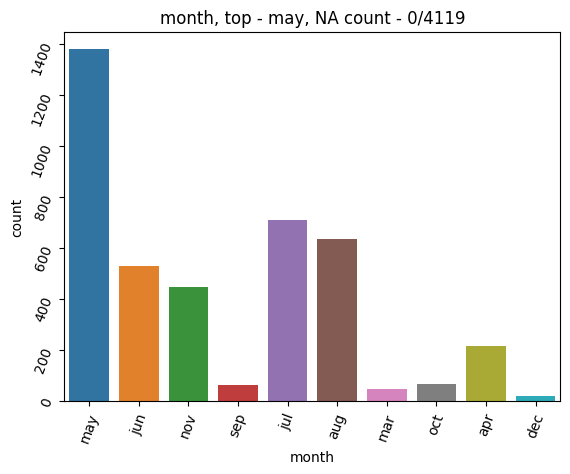

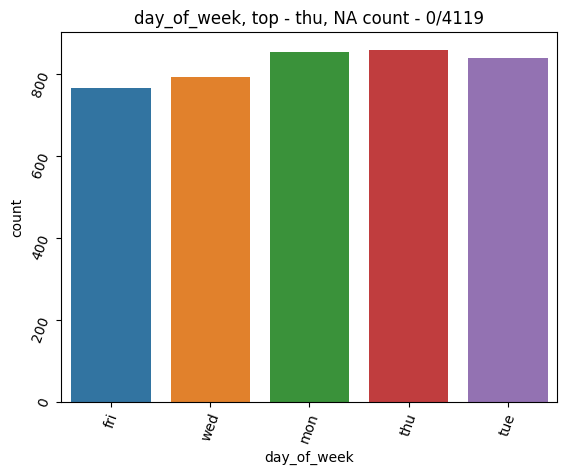

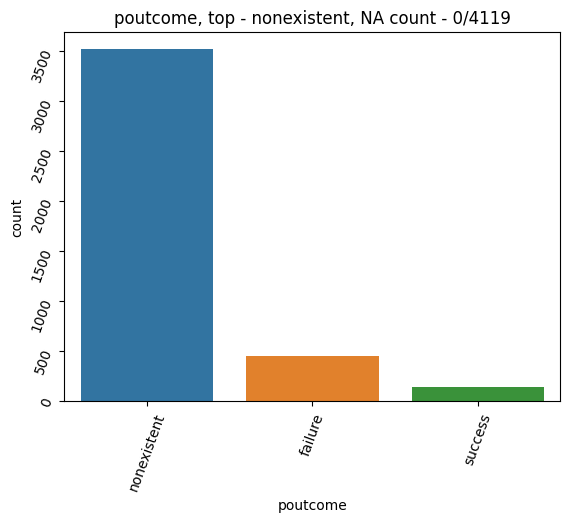

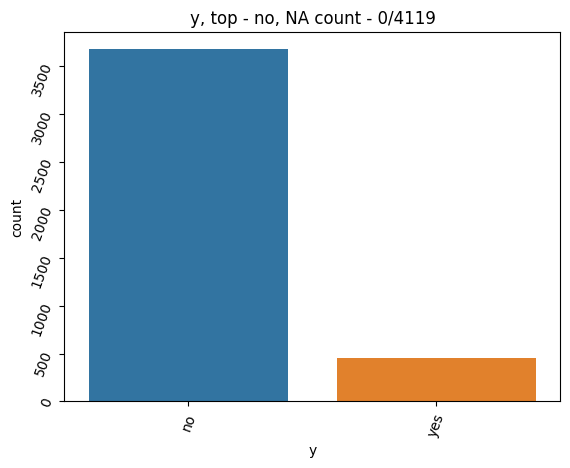

In [35]:
for col in df_bank_additional.select_dtypes(include=['object']).columns:
  sns.countplot(data=df_bank_additional, x=col).tick_params(labelrotation=70);
  plt.title(f"{col}, top - {df_bank_additional[col].mode().values[0]}, NA count - {df_bank_additional[col].isna().sum()}/4119")
  plt.show();

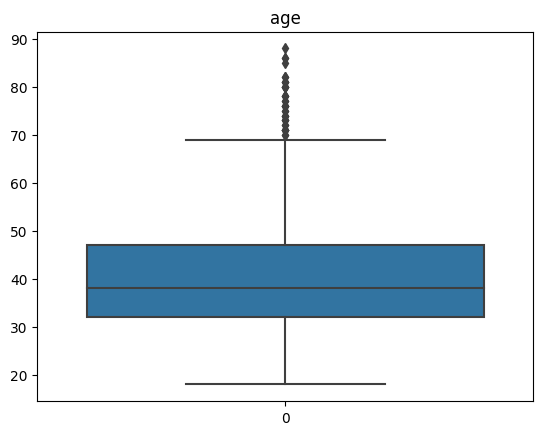

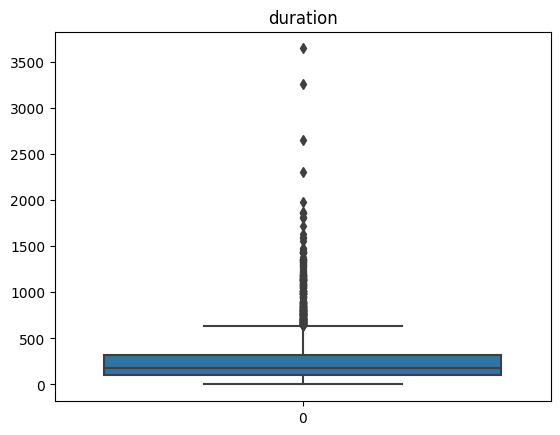

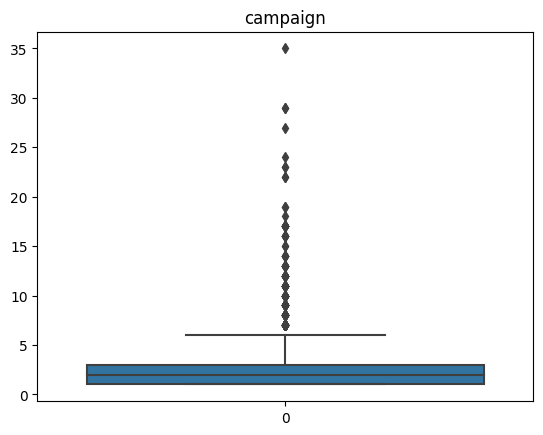

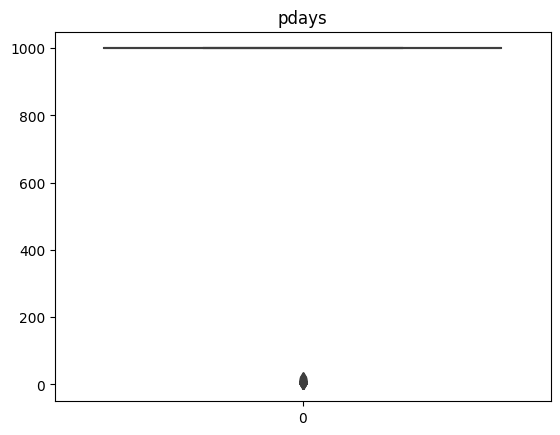

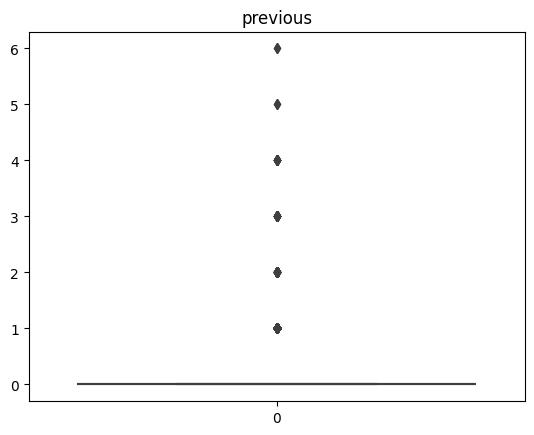

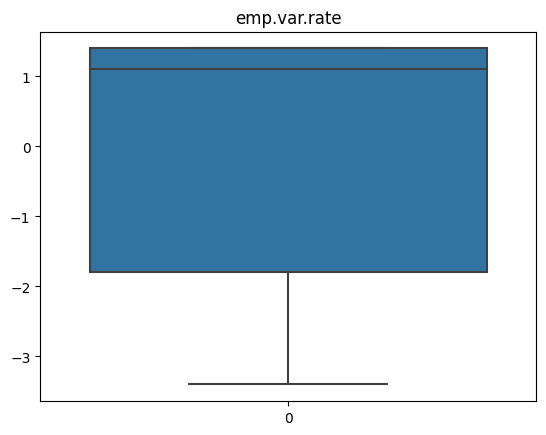

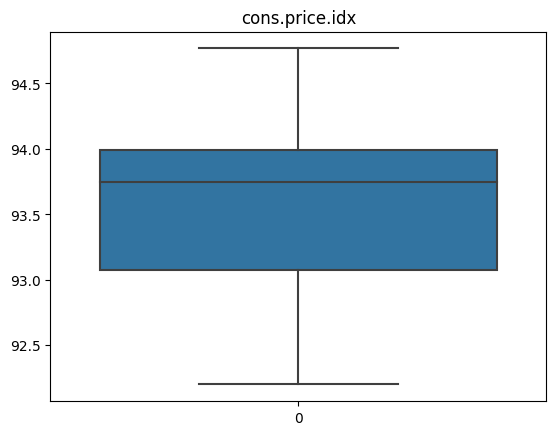

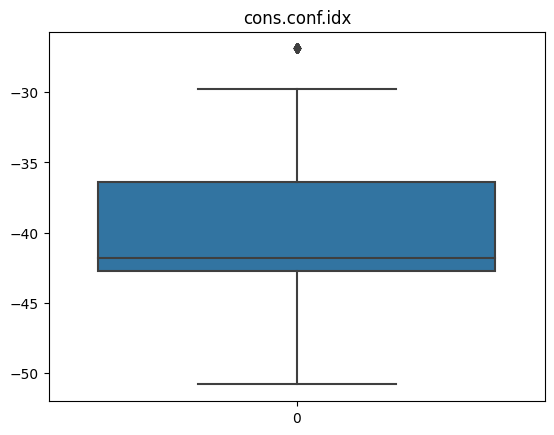

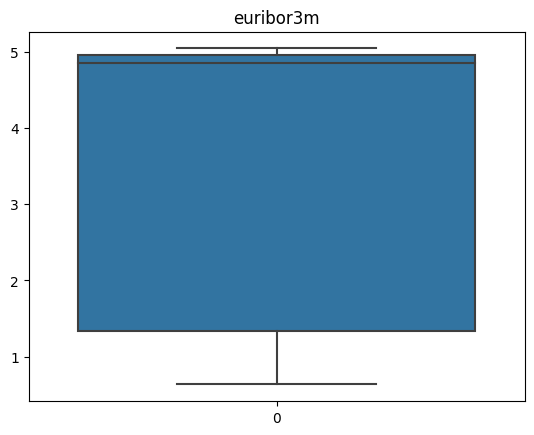

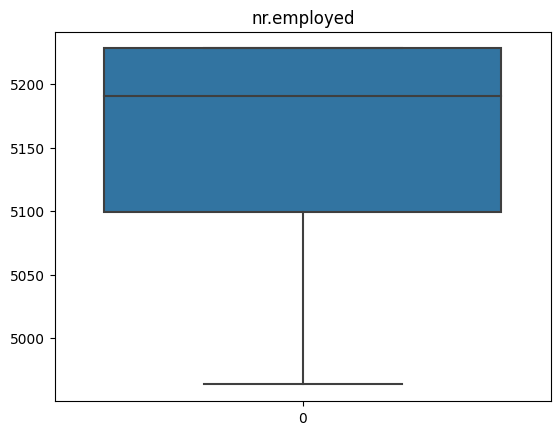

In [17]:
for col in df_bank_additional.select_dtypes(include=['float64']).columns:
  sns.boxplot(data=df_bank_additional[col])
  plt.title(col)
  plt.show();

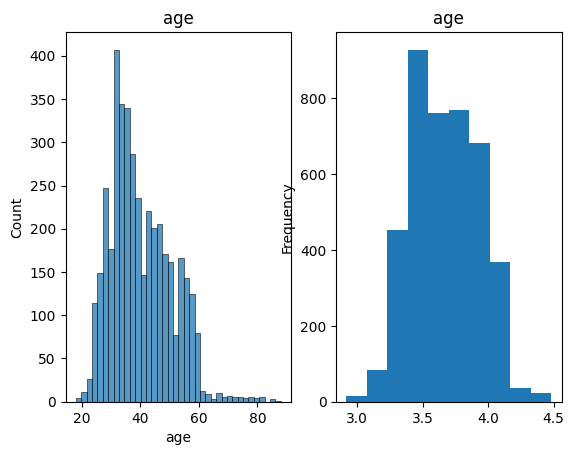

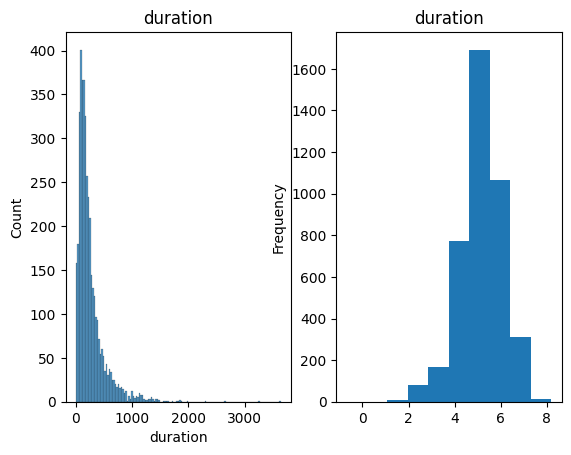

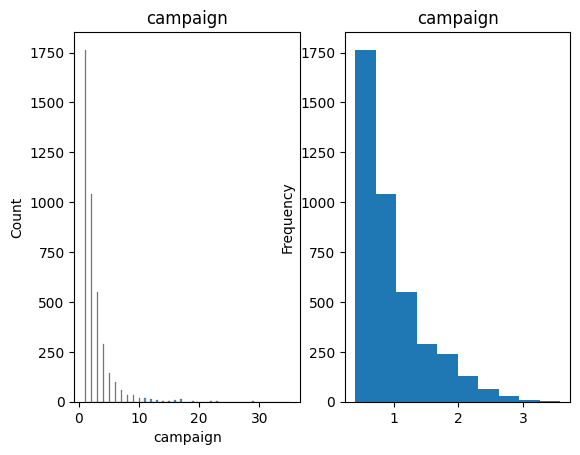

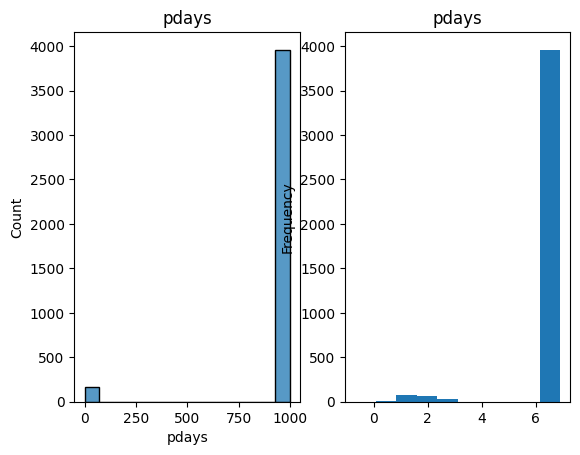

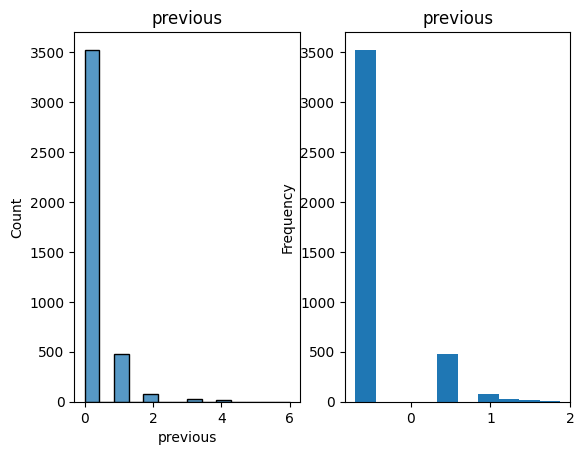

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


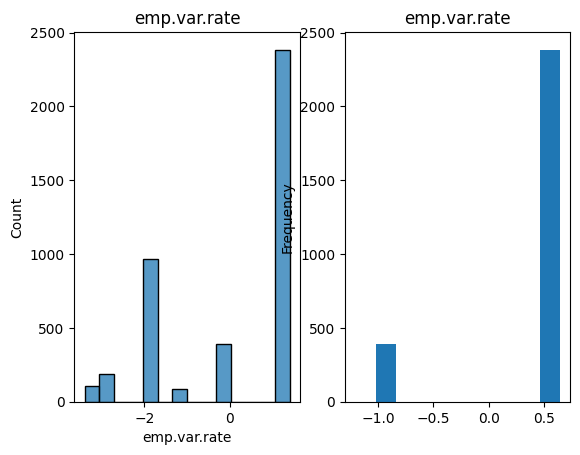

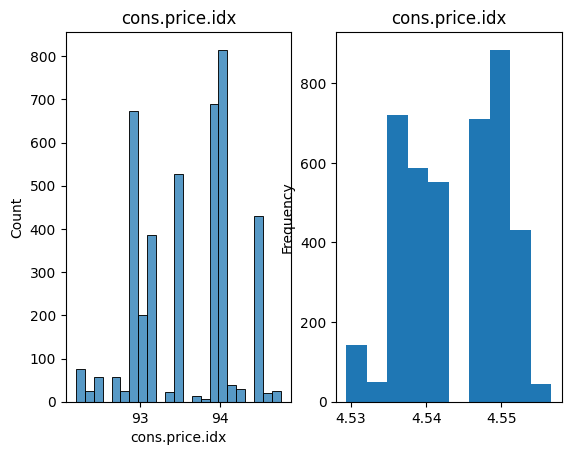

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


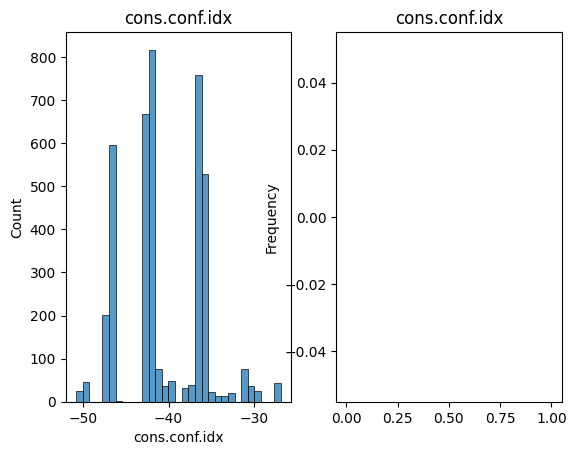

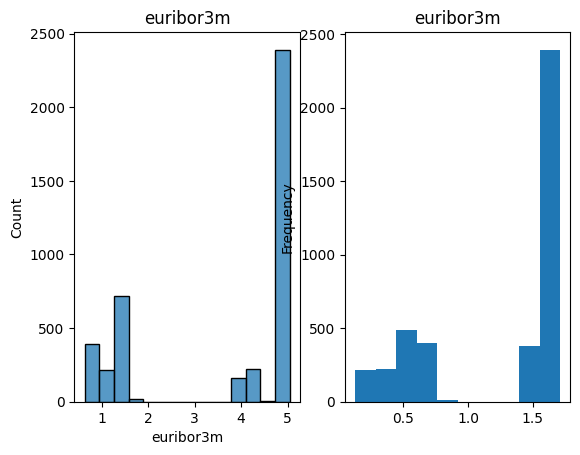

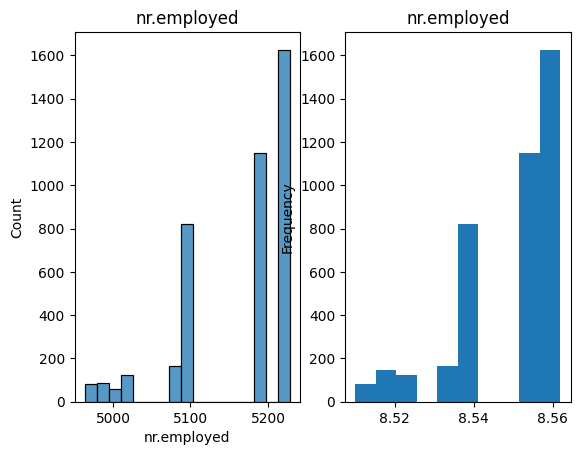

In [55]:
for col in df_bank_additional.select_dtypes(include=['float64']).columns:
  plt.subplot(121)
  sns.histplot(data=df_bank_additional[col])
  plt.title(col)
  plt.subplot(122)
  pd.Series(np.log(df_bank_additional[col]+0.5)).plot(kind='hist')
  plt.title(col)
  plt.show();

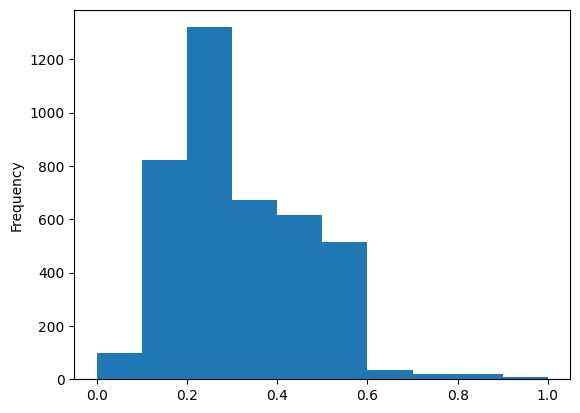

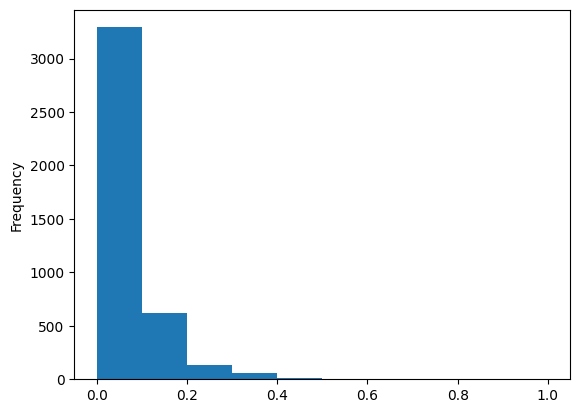

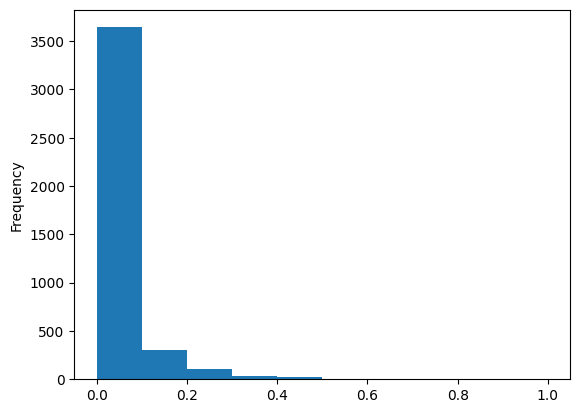

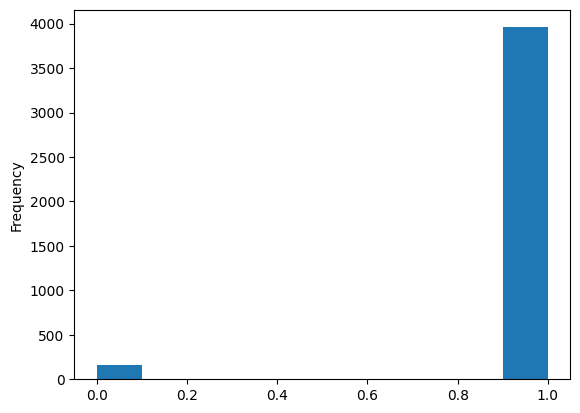

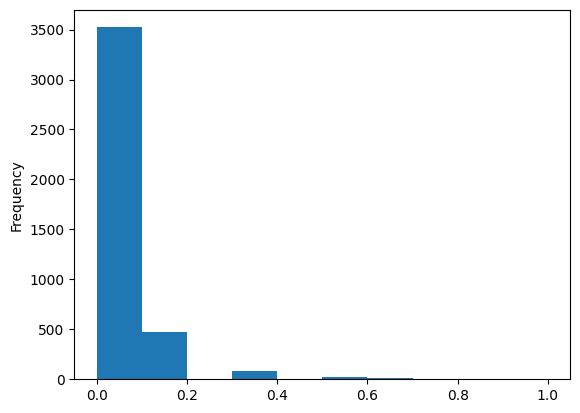

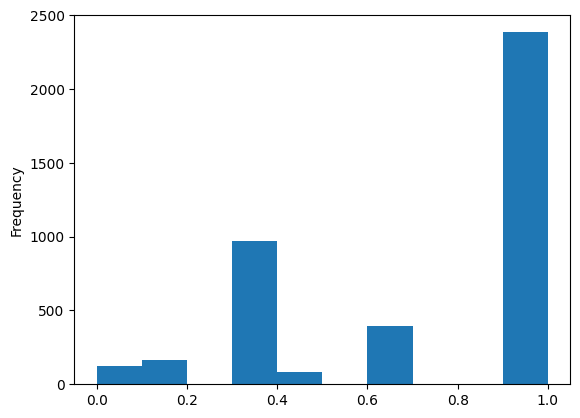

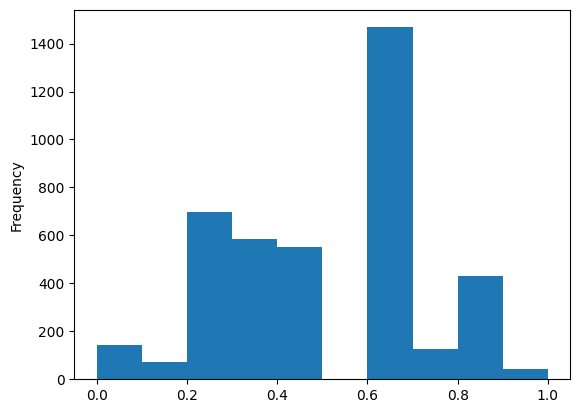

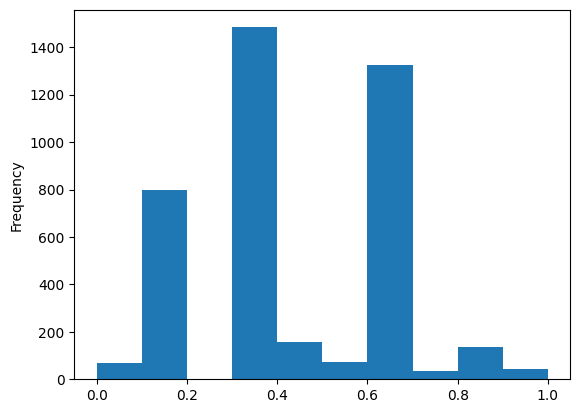

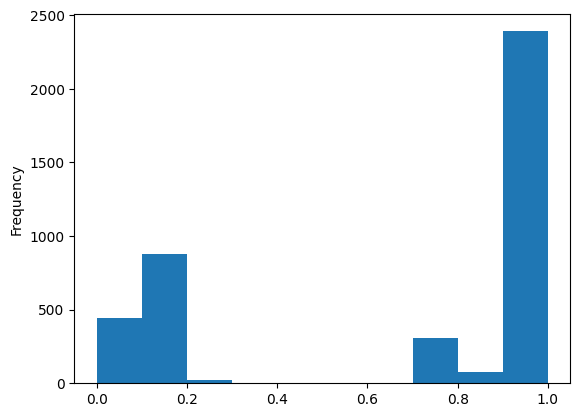

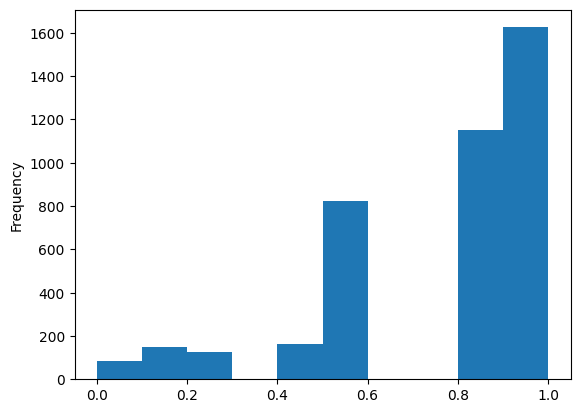

In [59]:
for col in df_bank_additional.select_dtypes(include=['float64']).columns:
  min_value = df_bank_additional[col].min()
  max_value = df_bank_additional[col].max()
  pd.Series((df_bank_additional[col] - min_value) / (max_value - min_value)).plot(kind='hist')
  plt.show()

<Axes: ylabel='Frequency'>

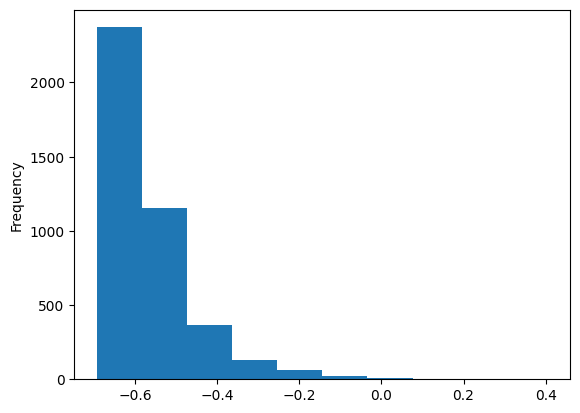

In [64]:
df3['duration']=np.log(df3['duration']+0.5)
df3['duration'].plot(kind='hist')